# Machine Learning class - Unsupervised Learning Example - Andrew Ng Assignment
## Clustering Unsupervised Learning Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
#pip install matplotlib

In [3]:
data = loadmat("ex7data2.mat")

In [4]:
type(data)
data.values

<function dict.values>

In [5]:
X=data['X']
type(X)

numpy.ndarray

In [6]:
list(data.items())
X[0:2,:]

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405]])

In [7]:
def findClosestCentroids(X,centroids):
    '''
    Finds the closest centroids in idx for a dataset X where each row is a single xy pair
    +1 is used to number centroids from 1 rather than 0
    For any given poinnt, find its closest centroid and index the centroid number to idx.
    '''
    K=centroids.shape[0]
    idx=np.zeros((X.shape[0],1))
    temp=np.zeros((centroids.shape[0],1))
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:] - centroids[j,:]
            length=np.sum(dist**2)
            temp[j]=length
        idx[i]=np.argmin(temp)+1
    return idx

In [8]:
initial_centroids=np.array([[8,5],[6.0,2.0],[3.0,3.0]])
idx=findClosestCentroids(X,initial_centroids)
print("Closest index for the first 3 examples: {} \n",(idx[0:3]))

Closest index for the first 3 examples: {} 
 [[3.]
 [1.]
 [2.]]


In [9]:
def computeCentroids(X,idx,K):
    '''
    calc the new centriod locations based on the new grouping of points.
    '''
    m,n=X.shape[0],X.shape[1]
    centroids=np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index=int((idx[i]-1)[0])
        centroids[index,:]=centroids[index,:]+X[i,:]
        count[index]+=1
    
    return centroids/count

In [10]:
K=3
computeCentroids(X,idx,K)

array([[7.11938687, 3.6166844 ],
       [5.81350331, 2.63365645],
       [2.42830111, 3.15792418]])

In [39]:
def plotKMeans(X,centroids,idx,K,num_iters):
    '''
    used to plot the new centroids.
    '''
    m,n=X.shape[0],X.shape[1]
    fig,ax=plt.subplots(num_iters,1,figsize=(6,36))
    
    for i in range(num_iters):
        color="rgb"
        for k in range(1,K+1):
            grp=(idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)
#Visualize new centroids
        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker="x",linewidth=3)
        title = "Iteration number" + str(i+1)
        ax[i].set_title(title)
        centroids=computeCentroids(X,idx,K)
        
        idx=findClosestCentroids(X,centroids)
    plt.tight_layout()

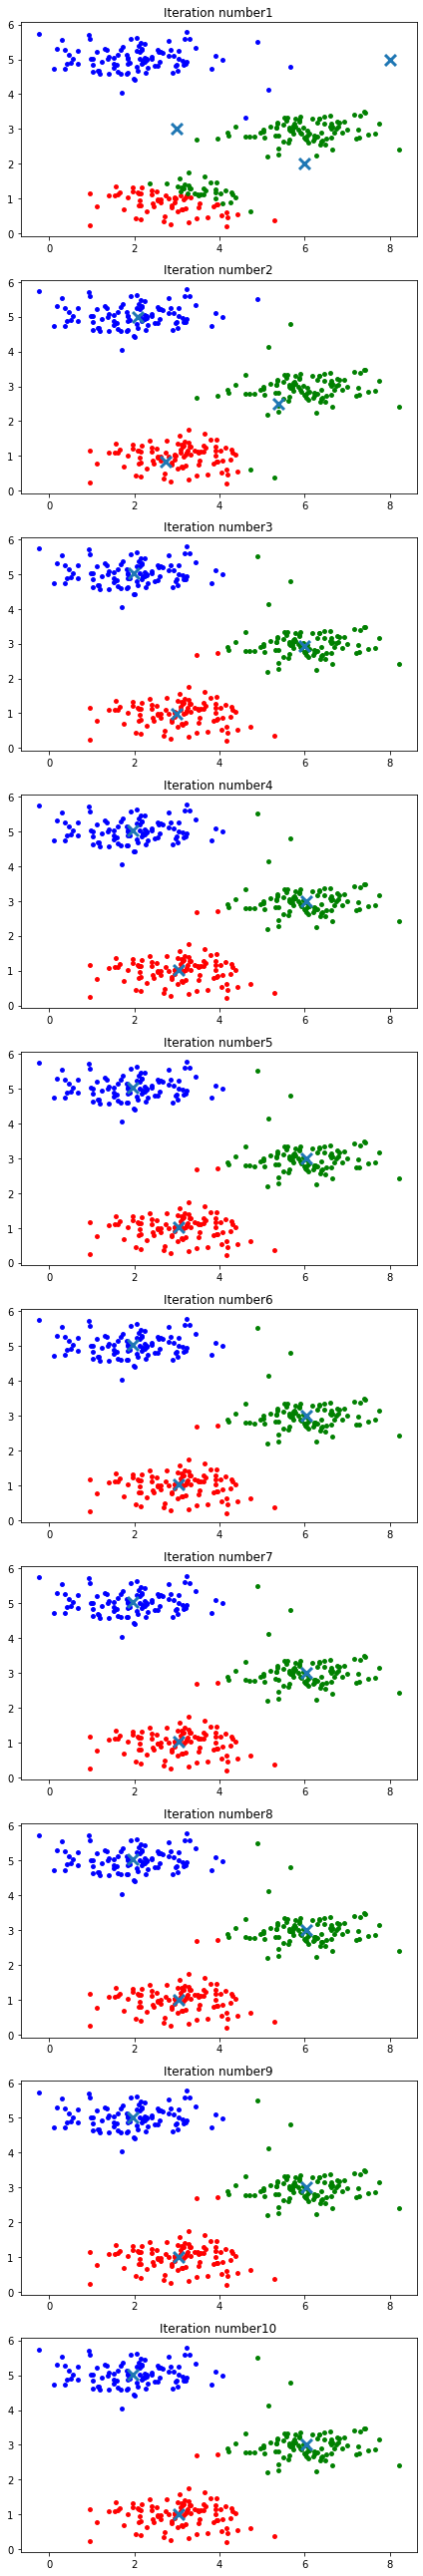

In [40]:
plotKMeans(X,initial_centroids,idx,K,num_iters=10)

In [41]:
def KMeansInitCentroids(X,K):
    '''
    This function initializes by randomly assigning one of the X values to one centroid and so on.  
    '''
    m,n=X.shape[0],X.shape[1]
    centroids=np.zeros((K,n))
    
    for i in range(K):
        centroids[i]=X[np.random.randint(0,m+1),:]
    
    return centroids           

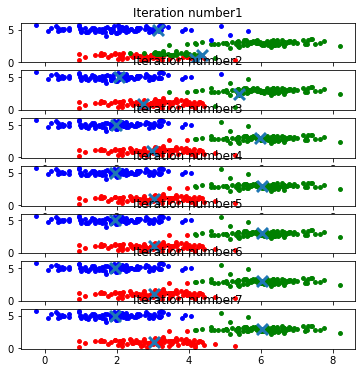

<Figure size 648x648 with 0 Axes>

In [14]:
centroids=KMeansInitCentroids(X,K)
idx=findClosestCentroids(X,centroids)
plotKMeans(X,centroids,idx,K,num_iters=7)

### New KMeans exercise using image as input file

In [15]:
data2=loadmat('bird_small.mat')
type(data2)

dict

In [16]:
list(data2.keys())

['__header__', '__version__', '__globals__', 'A']

In [17]:
A=data2["A"]

In [18]:
#preprocess and reshape the image
X2=(A/255).reshape(128*128,3)

In [20]:
def runKMeans(X,initial_centroids,num_iters,K):
    
    idx=findClosestCentroids(X,initial_centroids)
    
    for i in range(num_iters):
        centroids=computeCentroids(X,idx,K)
        idx=findClosestCentroids(X,initial_centroids)
    return centroids, idx

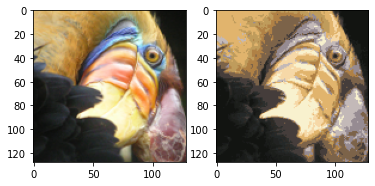

In [30]:
K2=16
num_iters=10
initial_centroids2=KMeansInitCentroids(X2,K2)
centroids2,idx2=runKMeans(X2,initial_centroids2,num_iters,K2)

m2,n2=X.shape[0],X.shape[1]
X2_recovered=X2.copy()

for i in range(1,K2+1):
    X2_recovered[(idx2==i).ravel(),:]=centroids2[i-1]

    #reshape the image to right dimension    
X2_recovered=X2_recovered.reshape(128,128,3)

#display image
import matplotlib.image as mpimg
fig,ax=plt.subplots(1,2)
ax[0].imshow(X2.reshape(128,128,3))
ax[1].imshow(X2_recovered)